In [2]:
import os.path

import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

from soma.generators.age import AgeGenerator
from soma.util.errors import compute_errors
from soma.tests.som import som_test

plt.style.use('seaborn')
plt.style.use('seaborn-paper')

In [3]:
brackets = [
    # First one repeated for cross-checking ("error" type 2 should be high)
    (15, 20), (15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50)
]
compare = list(zip(brackets[:-1], brackets[1:]))

In [4]:
if os.path.exists('../results/age_errors.csv'):
    print('Continue!')
    results = pandas.read_csv('../results/age_errors.csv', index_col=0)
else:
    results = DataFrame(columns=['error1', 'error2', 'time'], index=map(str, compare))

for ba, bb in compare:
    if results.loc[str((ba, bb))]['time'] > 0:
        print(f'Skipping {ba} {bb}')
        continue
    print(f'Running {ba} {bb}')
    gen_a = AgeGenerator(*ba)
    gen_b = AgeGenerator(*bb)
    results.loc[str((ba, bb))].loc[:] = compute_errors(gen_a, gen_b, som_test, alpha=0.001, samples=500, repeat=500,
                                                       return_duration=True)
    results.to_csv('../results/age_errors.csv')

Continue!
Skipping (15, 20) (15, 20)
Skipping (15, 20) (20, 25)
Skipping (20, 25) (25, 30)
Skipping (25, 30) (30, 35)
Skipping (30, 35) (35, 40)
Skipping (35, 40) (40, 45)
Skipping (40, 45) (45, 50)


In [5]:
results['power'] = 1 - results['error2']

In [7]:
print(results.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  error1 &  error2 &      time &  power \\
\midrule
((15, 20), (15, 20)) &   0.000 &   1.000 &  5.605129 &  0.000 \\
((15, 20), (20, 25)) &   0.000 &   0.000 &  5.607205 &  1.000 \\
((20, 25), (25, 30)) &   0.000 &   0.010 &  5.640037 &  0.990 \\
((25, 30), (30, 35)) &   0.002 &   0.274 &  5.586923 &  0.726 \\
((30, 35), (35, 40)) &   0.000 &   0.188 &  5.585581 &  0.812 \\
((35, 40), (40, 45)) &   0.000 &   0.436 &  5.585258 &  0.564 \\
((40, 45), (45, 50)) &   0.000 &   0.394 &  5.590803 &  0.606 \\
\bottomrule
\end{tabular}



# Visualization (mean)

In [2]:
gen_35_40 = AgeGenerator(35, 40)
gen_40_45 = AgeGenerator(40, 45)

g3540, g3540_age = gen_35_40.sample_with_age(10000)
g4045, g4045_age = gen_40_45.sample_with_age(10000)

In [20]:
p, som, (c3540, c4045) = som_test(g3540, g4045, (25, 25), ret_som=True, ret_counts=True)
p

0.0

In [21]:
som.get_surface_state()
bmus = som.get_bmus(som.activation_map)

In [22]:
all_ages = np.concatenate([g3540_age, g4045_age])
image = np.zeros_like(c3540, dtype=float)
count = np.zeros_like(c3540, dtype=int)
for i in range(len(bmus)):
    x,y = bmus[i]
    image[x,y] += all_ages[i]
    count[x,y] += 1
image /= count

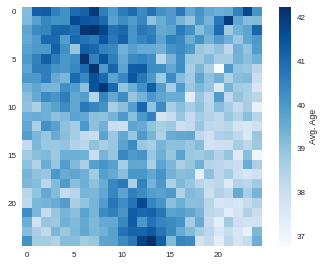

In [23]:
plt.figure()
plt.imshow(image, cmap='Blues')
plt.colorbar(label='Avg. Age')
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_avg.eps'), bbox_inches='tight')

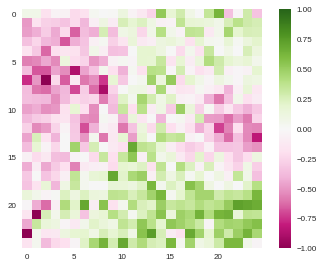

In [48]:
delta = (c3540 - c4045) / (c3540 + c4045)
plt.imshow(delta, cmap='PiYG', vmin=-1, vmax=1)
plt.colorbar()
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_map.eps'), bbox_inches='tight')

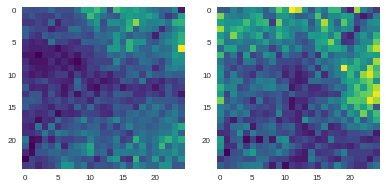

In [25]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(c3540, cmap='viridis')
axes[0].grid(False)
i = axes[1].imshow(c4045, cmap='viridis')
axes[1].grid(False)
fig.savefig(os.path.expanduser('~/Plots/age_both.eps'), bbox_inches='tight')

# Visualization (scale)

In [2]:
gen_30_40 = AgeGenerator(30, 40)
gen_20_50 = AgeGenerator(20, 50)

g3040, g3040_age = gen_30_40.sample_with_age(5000)
g2050, g2050_age = gen_20_50.sample_with_age(5000)

In [ ]:
p_scale, som_scale, (c3040, c2050) = som_test(g3040, g2050, (50, 90), ret_som=True, ret_counts=True)
p_scale

In [ ]:
som_scale.get_surface_state()
bmus_scale = som_scale.get_bmus(som_scale.activation_map)

In [ ]:
all_ages = np.concatenate([g3040_age, g2050_age])
image = np.zeros_like(c3040, dtype=float)
count = np.zeros_like(c3040, dtype=int)
for i in range(len(bmus_scale)):
    x,y = bmus_scale[i]
    image[x,y] += all_ages[i]
    count[x,y] += 1
image /= count

In [ ]:
plt.figure()
plt.imshow(image, cmap='Blues')
plt.colorbar(label='Avg. Age')
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_avg_scale.eps'), bbox_inches='tight')

In [ ]:
delta = (c3040 - c2050) / (c3040 + c2050)
plt.imshow(delta, cmap='PiYG', vmin=-1, vmax=1)
plt.colorbar()
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_map_scale.eps'), bbox_inches='tight')

In [ ]:
c2050==0

In [ ]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(c3040, cmap='viridis')
axes[0].grid(False)
i = axes[1].imshow(c2050, cmap='viridis')
axes[1].grid(False)
fig.savefig(os.path.expanduser('~/Plots/age_both_scale.eps'), bbox_inches='tight')